# Oasis Infobyte (Data Science)

## Vineetha C

## TASK 5

#### Build a machine learning model in Python to predict future sales for a product or service-based business based on advertising expenditures, target audience segmentation, and advertising platform choices.

In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import packages to create training models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from warnings import filterwarnings
filterwarnings(action='ignore')

# Advertising Dataset

In [2]:
df = pd.read_csv('Advertising.csv')
df

Unnamed: 0     TV  Radio  Newspaper  Sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]

# Data Exploration

In [3]:
df.shape

(200, 5)

In [4]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
df.describe()

Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   17.400000
max    200.000000  296.400000   49.600000  114.000000   27.000000

In [7]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [8]:
df.nunique()

Unnamed: 0    200
TV            190
Radio         167
Newspaper     172
Sales         121
dtype: int64

In [9]:
df.describe()

Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   17.400000
max    200.000000  296.400000   49.600000  114.000000   27.000000

# Data Cleaning

In [10]:
df.drop(columns=['Unnamed: 0'], inplace = True)
df.head()

TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

# Data Visualization

### Heatmap / Corelation matrix

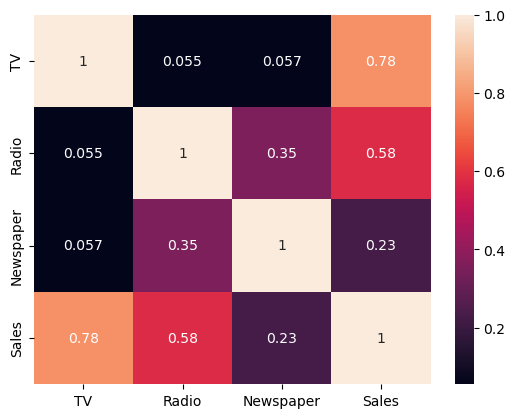

In [11]:
sns.heatmap(df.corr(), annot = True)
plt.show()

### Histograms

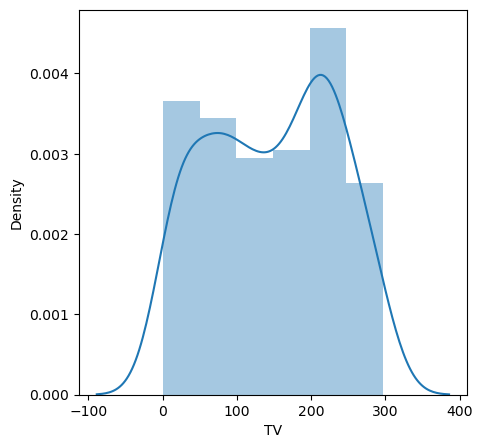

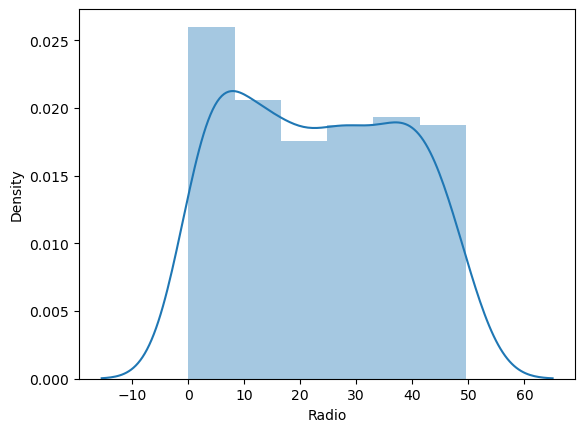

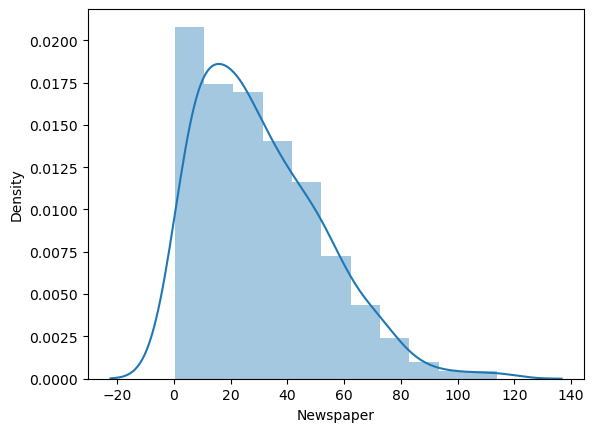

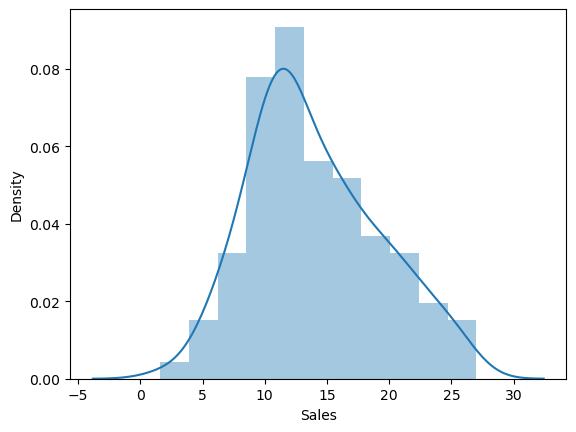

In [12]:
plt.figure(figsize = (5, 5))

for i in df.columns:
    sns.distplot(df[i])
    plt.show()

### Pairplot

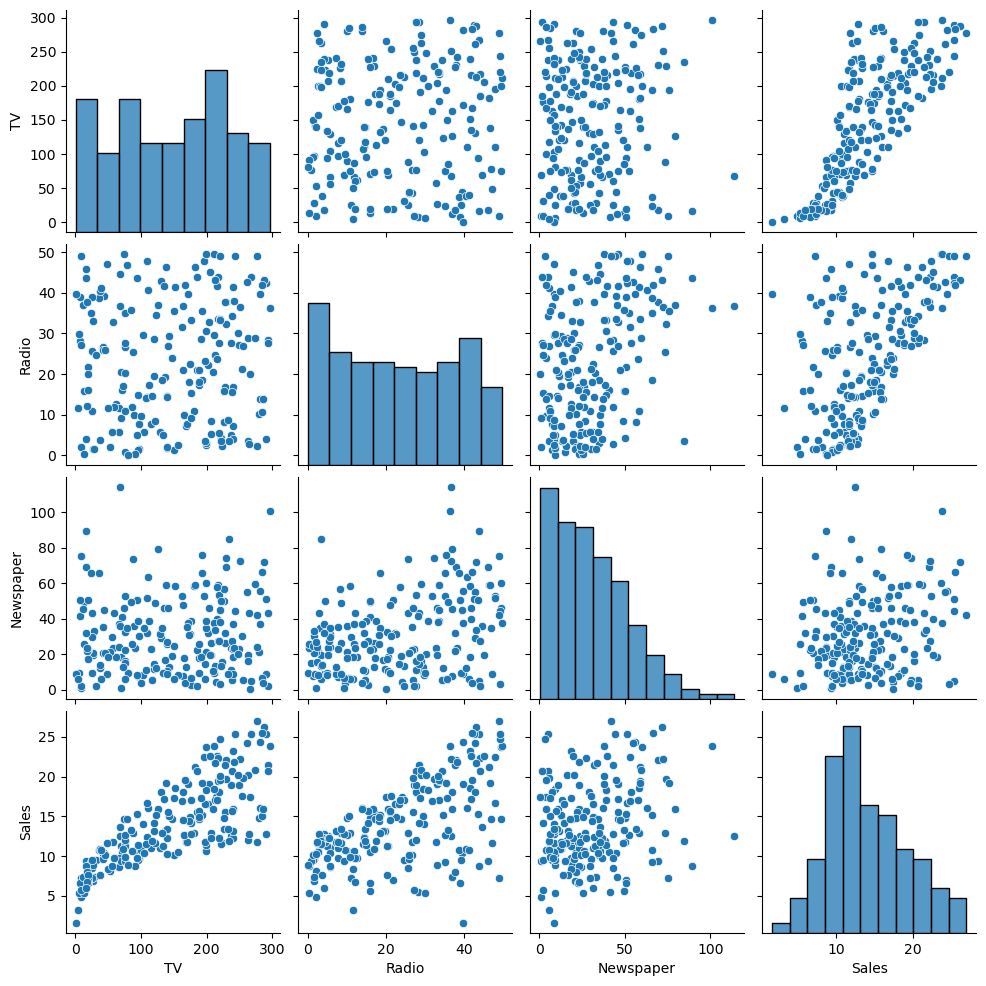

In [13]:
sns.pairplot(df)

# Training the model

In [14]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### Linear Regression

#### Model

In [15]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

#### Prediction of target variable

In [16]:
y_pred = lm.predict(X_test)
print(y_pred)

[19.8050711  15.50881014 17.82712639  9.78627026 12.26950459  9.35614577
  9.88338476 17.23724542 23.25401752  9.13187302 14.87203282 20.68040313
 23.0864534   8.84484493 20.18328486 12.49785802  7.65329271 21.45758273
  7.60390313 20.67311558 15.26316777 18.11853212 18.40807448 11.31432196
 11.47222736 16.4449731  16.83623851 17.20025145 12.27441117 15.31707803
 20.64488982 17.82711068 18.86517096  7.8938349   9.91372731 18.75323436
 14.11600845  9.84401242 10.38601597 22.70515663]


#### Metrics of model

In [18]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Mean absolute error:',  mae)
print('Mean squared error:',  mae)
print('Root mean squared error:',  mae)
print('R squared error:',  r2)

Mean absolute error: 1.0603857020854377
Mean squared error: 1.0603857020854377
Root mean squared error: 1.0603857020854377
R squared error: 0.9337674688768745
